In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
from utils.env_utils import create_env
from controller.mppi import MPPI

In [13]:
params = {'seed':42,
          'h':0.02,
          #'env_name':'Pendulum-v1',
          #'env_name':'CartPole-v1',
          #'env_name':'Acrobot-v1',
          'env_name':'Acrobot-v1.1',
          'render_mode':'rgb_array',
          'sample_type':'cubic',
          #'sample_type':'normal',
          'n_knots':30,
          'horizon':60,
          'temperature':1.0,
          'n_samples':1000,
          'noise_sigma':0.6}

In [14]:
env = create_env(params["env_name"], 
                 seed=params['seed'], 
                 dt=params['h'], 
                 render_mode=params['render_mode'])

In [15]:
controller_jax = MPPI(env, params)

In [16]:
controller_jax.reset_planner()
obs, _ = env.reset()
done = False

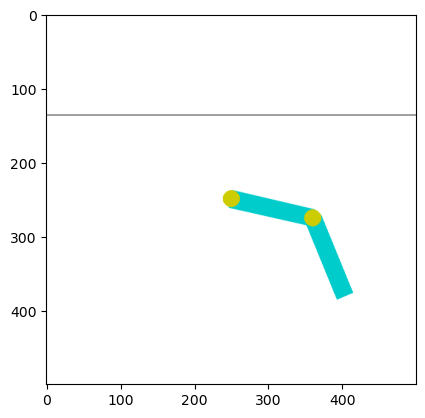

In [ ]:
while not done:
    u = controller_jax.get_u(obs.reshape((-1,1)))
    obs, _, done, _, _ = env.step(u)
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()
env.close()